# This is Colab Notebook (ipynb) of  the **GDSC Machine Learning Hackathon** for **Team Lifergy**

## This Notebook include the Diesel Consumption Model capable of estimating diesel consumption before it occurs. It uses the EAJ0001C  Hub Site Datasets

### Team Members include:
*   Aberejo Habeeblah O. (Team Lead)
*   Aina Ogechukwu (Query Analyst)
*   Raheem David
*   Micheal  Ezeane

# Data Loading

In [1]:
!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

# ARIMA functions and libraries imported here
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA

!pip install scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# For prophet algorithms Model
!pip install pystan==2.19.1.1
!pip install fbprophet
!pip install prophet
from prophet import Prophet

# For Extreme Gradient Boost Model
!pip install xgboost
from xgboost import XGBRegressor

# for evaluation
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/studio-lab-user/.conda/envs/default/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-r5qyry_a/fbprophet_f4040ffe93414dcfa492735ab90d45a6/setup.py'"'"'; __file__='"'"'/tmp/pip-install-r5qyry_a/fbprophet_f4040ffe93414dcfa492735ab90d45a6/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-3df94xm3
       cwd: /tmp/pip-install-r5qyry_a/fbprophet_f4040ffe93414dcfa492735ab90d45a6/
  Complete output (56 lines):
  /tmp/pip-install-r5qyry_a/fbprophet_f4040ffe93414dcfa492735ab90d45a6/setup.py:10: DeprecationWarning: pkg_resources is d

Importing plotly failed. Interactive plots will not work.


In [2]:
import pandas as pd
import os
from io import StringIO

# Install wget if not already installed
!pip install wget

# Function to download file from Google Drive
def download_from_drive(gdrive_id):
    # Construct the download link
    download_link = f"https://drive.google.com/uc?id={gdrive_id}"

    # Use wget to download the file and return content
    return os.popen(f"wget --quiet --no-check-certificate -O - '{download_link}'").read()

# Specifying the hackathon dataset link
dataset_links = [
    '1HXVXS1ODeKxxTH-0N_uFYZhJ_dxgpcY9',  # file ID for file 1
    '1Ekv0VZaqsVgxf5D3AdNtQHnnWS-Cje9c',  # file ID for file 2
    '1goA3or-Cfk6zHF_ooqdSUObl9aUqTwu6',  # file ID for file 3
    '12cVx7OV-jqvcYWlPMMZZoj5ND6erq2El'   # file ID for file 4 and  # Load the test dataset
]

# Download and read datasets
data_df1 = pd.read_csv(StringIO(download_from_drive(dataset_links[0])), header=None, skiprows=[0, 1, 2])
data_df2 = pd.read_csv(StringIO(download_from_drive(dataset_links[1])), header=None, skiprows=[0, 1, 2])
data_df3 = pd.read_csv(StringIO(download_from_drive(dataset_links[2])), header=None, skiprows=[0, 1, 2])
data_df4 = pd.read_csv(StringIO(download_from_drive(dataset_links[3])), header=None, skiprows=[0, 1, 2])

# Display the first few rows of the data
print(data_df1.head())
print(data_df2.head())
print(data_df3.head())
print(data_df4.head())

                   0    1           2    3     4     5    6    7    8    9    \
0  2023-08-28 16:05:21  0.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
1  2023-08-28 16:06:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
2  2023-08-28 16:07:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
3  2023-08-28 16:08:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
4  2023-08-28 16:09:21  2.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   

   ...   103    104   105  106  107       108       109   110  111      112  
0  ...  78.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
1  ...  79.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
2  ...  76.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
3  ...  82.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
4  ...  76.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  

[5 rows x 113 columns]
                   0    1  

In [3]:
loading = '''
# For the same of loading locally or form Amazon Sagemager Studio Lab
download_link_1 = 'data_df1.csv'
download_link_2 = 'data_df2.csv'
download_link_3 = 'data_df3.csv'
download_link_4 = 'data_df4.csv'



data_df1 = pd.read_csv(download_link_1, header = None, skiprows = [0,1,2])
data_df2 = pd.read_csv(download_link_2, header = None, skiprows = [0,1,2])
data_df3 = pd.read_csv(download_link_3, header = None, skiprows = [0,1,2])
data_df4 = pd.read_csv(download_link_4, header = None, skiprows = [0,1,2])'''

In [4]:
# Display the first few rows of the data
print(data_df1.head())
print(data_df2.head())
print(data_df3.head())
print(data_df4.head())

                   0    1           2    3     4     5    6    7    8    9    \
0  2023-08-28 16:05:21  0.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
1  2023-08-28 16:06:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
2  2023-08-28 16:07:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
3  2023-08-28 16:08:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
4  2023-08-28 16:09:21  2.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   

   ...   103    104   105  106  107       108       109   110  111      112  
0  ...  78.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
1  ...  79.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
2  ...  76.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
3  ...  82.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
4  ...  76.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  

[5 rows x 113 columns]
                   0    1  

# Data Preprocessing and cleaning

In [5]:
# Display the shape of the DataFrame and total null
print(f'For data with adjusted heading, shape is {data_df1.shape}, total no of null is {data_df1.isnull().sum().sum()}')
print(f'For data with adjusted heading, shape is {data_df2.shape}, total no of null is {data_df2.isnull().sum().sum()}')
print(f'For data with adjusted heading, shape is {data_df3.shape}, total no of null is {data_df3.isnull().sum().sum()}')
print(f'For data with adjusted heading, shape is {data_df4.shape}, total no of null is {data_df4.isnull().sum().sum()}')


For data with adjusted heading, shape is (90186, 113), total no of null is 2734783
For data with adjusted heading, shape is (89708, 107), total no of null is 2217606
For data with adjusted heading, shape is (88733, 109), total no of null is 2447560
For data with adjusted heading, shape is (4455, 95), total no of null is 53972


With the result from this, my datasets shape, they have different number of columns meaning they have differnt columns. I will only be working on common columns

In [6]:
# Specifying the row indices i am loading
rows_to_load = [0, 1, 2]

# Load the specific rows into a DataFrame, i.e rows specified in the list above
data_head_df1 = pd.read_csv(StringIO(download_from_drive(dataset_links[0])), header = None, skiprows=lambda x: x not in rows_to_load)
data_head_df2 = pd.read_csv(StringIO(download_from_drive(dataset_links[1])), header = None, skiprows=lambda x: x not in rows_to_load)
data_head_df3 = pd.read_csv(StringIO(download_from_drive(dataset_links[2])), header = None, skiprows=lambda x: x not in rows_to_load)
data_head_df4 = pd.read_csv(StringIO(download_from_drive(dataset_links[3])), header = None, skiprows=lambda x: x not in rows_to_load)

# TO get a view of the 1st head datasets
data_head_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,timestamp,Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],...,System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [261]
1,Africa/Lagos (+01:00),VRM Log time offset,ESS Scheduled Charging,Grid setpoint,Relay 1 state,CCGX Relay 2 state,Relay 1 function,Relay 2 function,Whether system accepts Dynamic ESS instructions.,Minimum battery SOC below which selling always...,...,VE.Bus charge power,Battery SOC,Battery state,Battery Consumed Amphours,Battery Time to Go,DVCC Multiple batteries alarm,GX Error #48 DVCC with incompatible firmware,AC-Input,Consumption Forecast,Grid alarm
2,NaN,s,NaN,W,NaN,NaN,NaN,NaN,NaN,%,...,W,%,NaN,Ah,h,NaN,NaN,NaN,Wh,NaN


From the view above, my head dataset need lots of refinement, i will creat a user defined function below to handle that

In [7]:
# Here i adjust the row with the unit column by inserting it in bracket to meet standard and quick recognition as i move ahead
def header_writer(data_df = '', data_head_df = ''):
    '''This functions prepares by header file by
    1. Add () to the 3rd row of the datasets making it look like a unit
    2. Join the forst 3 rows found the in head dataset
    3. After changes, make the new created column for head the head of the dataset'''
    b_bracket = '('
    a_bracket= ')'
    data_head_df.iloc[2] = data_head_df.iloc[2].apply(lambda x: f"{b_bracket}{x}{a_bracket}" if pd.notna(x) else x)
    # i then filled empty cells on the row with just whitespace, this will aid in my joining of the rows later
    data_head_df.iloc[2] = data_head_df.iloc[2].fillna(' ')
    new_row_for_header = data_head_df.iloc[0:3].apply(lambda x: '. '.join(x), axis = 0)
    data_head_df.loc[2] = new_row_for_header
    # TO reset my index after all adjtment
    data_head_df.reset_index(drop=True, inplace = True)
    data_head_df.iloc[0] = data_head_df.iloc[2] # Assigning row index 2 as my column i.e as header
    data_head_df.reset_index(drop=True, inplace = True)

    data_df.columns = data_head_df.iloc[2]
    # From above, i noticed my header is assigned index 2 because of how i handled it from the row, so now, lets remove
    #data_df.columns = data_head_df.columns.set_names(None)
    A_data_df = data_df
    return data_df

In [8]:
header_writer(data_df1, data_head_df1)
data_df1.columns = data_df1.columns.set_names(None)
data_df1

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Grid setpoint. (W),Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,Gateway [0]. Relay 1 function.,Gateway [0]. Relay 2 function.,Gateway [0]. Whether system accepts Dynamic ESS instructions..,Gateway [0]. Minimum battery SOC below which selling always stops. (%),...,System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [0]. Consumption Forecast. (Wh),System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,78.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
1,2023-08-28 16:06:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,79.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
2,2023-08-28 16:07:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
3,2023-08-28 16:08:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,82.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4,2023-08-28 16:09:21,2.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90181,2023-10-27 16:00:51,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,69.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
90182,2023-10-27 16:01:51,2.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,68.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
90183,2023-10-27 16:02:51,2.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,71.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
90184,2023-10-27 16:03:51,0.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,69.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok


In [9]:
header_writer(data_df2, data_head_df2) # FOr second dataset
data_df2.columns = data_df2.columns.set_names(None)

# FOr third dataset
header_writer(data_df3, data_head_df3)
data_df3.columns = data_df3.columns.set_names(None)

# FOr forth dataset
header_writer(data_df4, data_head_df4)
data_df4.columns = data_df4.columns.set_names(None)
data_df4

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,Gateway [0]. Actual working state of Dynamic ESS.,Gateway [0]. Dynamic ESS error code.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),...,System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [0]. Consumption Forecast. (Wh),System overview [261]. Grid alarm.
0,2023-10-27 16:05:51,1.0,Not active,Open,Open,Off,No error,Ok,222.7,16.9,...,66.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
1,2023-10-27 16:06:51,1.0,Not active,Open,Open,Off,No error,Ok,223.5,14.8,...,70.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
2,2023-10-27 16:07:51,1.0,Not active,Open,Open,Off,No error,Ok,223.5,15.9,...,66.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
3,2023-10-27 16:08:51,2.0,Not active,Open,Open,Off,No error,Ok,223.5,13.2,...,66.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4,2023-10-27 16:09:51,2.0,Not active,Open,Open,Off,No error,Ok,223.5,13.2,...,67.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2023-10-30 16:00:55,0.0,Not active,Open,Open,Off,No error,Ok,215.1,13.8,...,71.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4451,2023-10-30 16:01:55,0.0,Not active,Open,Open,Off,No error,Ok,216.0,14.8,...,70.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4452,2023-10-30 16:02:55,1.0,Not active,Open,Open,Off,No error,Ok,215.1,16.4,...,70.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4453,2023-10-30 16:03:55,1.0,Not active,Open,Open,Off,No error,Ok,216.8,13.8,...,70.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok


In [10]:
# Because of the preprocessing done in the header and tlater adding to the rows of the dataset
# in some cases, the datatype of every column changes of object (even with columns with fint and flost)
# So, lets chreck the datasets of every columns
data_df1.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Grid setpoint. (W)                                         float64
Gateway [0]. Relay 1 state.                                              object
                                                                         ...   
System overview [0]. DVCC Multiple batteries alarm.                      object
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [0]. Consumption Forecast. (Wh)                         float64
System overview [261]. Grid alarm.                                       object
Length: 113, dtype: object

In [11]:
data_df2.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                     int64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Grid setpoint. (W)                                         float64
Gateway [0]. Relay 1 state.                                              object
                                                                         ...   
System overview [0]. Battery Time to Go. (h)                            float64
System overview [0]. DVCC Multiple batteries alarm.                      object
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [261]. Grid alarm.                                       object
Length: 107, dtype: object

In [12]:
data_df3.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Grid setpoint. (W)                                         float64
Gateway [0]. Relay 1 state.                                              object
                                                                         ...   
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [261]. Grid alarm.                                       object
Temperature sensor [23]. Temperature status.                             object
Temperature sensor [24]. Temperature status.                             object
Length: 109, dtype: object

In [13]:
data_df4.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Relay 1 state.                                              object
Gateway [0]. CCGX Relay 2 state.                                         object
                                                                         ...   
System overview [0]. DVCC Multiple batteries alarm.                      object
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [0]. Consumption Forecast. (Wh)                         float64
System overview [261]. Grid alarm.                                       object
Length: 95, dtype: object

In [14]:
# Getting the columns
columns_df1 = set(data_df1.columns)
columns_df2 = set(data_df2.columns)
columns_df3 = set(data_df3.columns)
columns_df4 = set(data_df4.columns)

# Find the common columns using the intersection of sets
common_columns = columns_df1.intersection(columns_df2, columns_df3, columns_df4)

# Convert the result back to a list if needed
common_columns_list = list(common_columns)

# Display the common columns
print(f'Common Columns from the dataset are :{common_columns_list}. \n their total is {len(common_columns_list)}')


Common Columns from the dataset are :['System overview [0]. VE.Bus charge current. (A)', 'Battery Monitor [260]. State of charge. (%)', 'Battery Monitor [260]. Charged Energy. (kWh)', 'VE.Bus System [261]. Low battery L3.  ', 'Battery Monitor [260]. Low state-of-charge alarm.  ', 'Battery Monitor [260]. Time since last full charge.  ', 'VE.Bus System [261]. Input voltage phase 1. (V)', 'System overview [0]. AC-Input.  ', 'VE.Bus System [261]. VE.Bus Error.  ', 'System overview [0]. VE.Bus charge power. (W)', 'VE.Bus System [261]. High DC Ripple L1.  ', 'VE.Bus System [261]. Temperature L2.  ', 'VE.Bus System [261]. Ignore AC input 2.  ', 'Gateway [0]. CCGX Relay 2 state.  ', 'Gateway [0]. ESS Scheduled Charging.  ', 'VE.Bus System [261]. Voltage. (V)', 'VE.Bus System [261]. Temperature L3.  ', 'VE.Bus System [261]. Ignore AC input.  ', 'System overview [0]. Battery SOC. (%)', 'VE.Bus System [261]. Input frequency 1. (Hz)', 'VE.Bus System [261]. Overload L2.  ', 'VE.Bus System [261]. In

In [15]:
#creating a function to drop columns not common between all the dataset
def drop_common_columns(data_df, common_columns_list):
    columns_to_drop = [column for column in data_df.columns if column not in common_columns_list]
    data_df.drop(columns=columns_to_drop, inplace=True)
    return data_df

In [16]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df1,common_columns_list)

data_df1.shape

(90186, 92)

In [17]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df2,common_columns_list)

data_df2.shape

(89708, 92)

In [18]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df3,common_columns_list)

data_df3.shape

(88733, 92)

In [19]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df4,common_columns_list)

data_df4.shape

(4455, 92)

In [20]:
#lets join our three dataset together
data_df = pd.concat([data_df1,data_df2,data_df3,data_df4])
data_df.head()

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),...,System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,...,11.366,78.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
1,2023-08-28 16:06:21,1.0,Not active,Open,Open,Ok,216.0,20.6,50.36,4066.0,...,11.364,79.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
2,2023-08-28 16:07:21,1.0,Not active,Open,Open,Ok,216.8,19.0,50.36,4023.0,...,11.362,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
3,2023-08-28 16:08:21,1.0,Not active,Open,Open,Ok,217.6,16.4,50.36,4177.0,...,11.362,82.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
4,2023-08-28 16:09:21,2.0,Not active,Open,Open,Ok,217.6,17.5,50.10,3893.0,...,11.362,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok


In [21]:
data_df.shape

(273082, 92)

In [22]:
pd.set_option('display.max_columns', None)

data_df

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.50,1.1,AC Input 2,32.0,32.0,32.0,Absorption,No error,On,Ok,O

In [23]:
pd.set_option('display.max_columns', None)

print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 273082 entries, 0 to 4454
Data columns (total 92 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   timestamp. Africa/Lagos (+01:00).                                     273082 non-null  object 
 1   Gateway [0]. VRM Log time offset. (s)                                 271578 non-null  float64
 2   Gateway [0]. ESS Scheduled Charging.                                  271575 non-null  object 
 3   Gateway [0]. Relay 1 state.                                           271569 non-null  object 
 4   Gateway [0]. CCGX Relay 2 state.                                      271569 non-null  object 
 5   VE.Bus System [261]. Phase rotation.                                  271558 non-null  object 
 6   VE.Bus System [261]. Input voltage phase 1. (V)                       271509 non-null  floa

In [24]:
def null_counter(dataframe = ''):
    pd.set_option('display.max_rows', None)
    null_values = dataframe.isnull().sum()

    print("Columns with Null Values:")
    print(null_values)

    total_nullvalue = null_values.sum()
    print(f'\n\n Total null-value in this dataset is {null_values.sum()}')

null_counter(data_df)

Columns with Null Values:
timestamp. Africa/Lagos (+01:00).                                            0
Gateway [0]. VRM Log time offset. (s)                                     1504
Gateway [0]. ESS Scheduled Charging.                                      1507
Gateway [0]. Relay 1 state.                                               1513
Gateway [0]. CCGX Relay 2 state.                                          1513
VE.Bus System [261]. Phase rotation.                                      1524
VE.Bus System [261]. Input voltage phase 1. (V)                           1573
VE.Bus System [261]. Input current phase 1. (A)                           1568
VE.Bus System [261]. Input frequency 1. (Hz)                              1572
VE.Bus System [261]. Input power 1. (W)                                   1568
VE.Bus System [261]. Output voltage phase 1. (V)                          1568
VE.Bus System [261]. Output current phase 1. (A)                          1569
VE.Bus System [261]. Outpu

In [25]:
#Using the nunique() method for a quick full overview of unique values in every column of my dataset

data_df.nunique()

timestamp. Africa/Lagos (+01:00).                                       273082
Gateway [0]. VRM Log time offset. (s)                                     6677
Gateway [0]. ESS Scheduled Charging.                                         1
Gateway [0]. Relay 1 state.                                                  2
Gateway [0]. CCGX Relay 2 state.                                             1
VE.Bus System [261]. Phase rotation.                                         1
VE.Bus System [261]. Input voltage phase 1. (V)                            176
VE.Bus System [261]. Input current phase 1. (A)                             64
VE.Bus System [261]. Input frequency 1. (Hz)                                52
VE.Bus System [261]. Input power 1. (W)                                   4601
VE.Bus System [261]. Output voltage phase 1. (V)                           162
VE.Bus System [261]. Output current phase 1. (A)                           185
VE.Bus System [261]. Output frequency. (Hz)         

In [26]:
# Using this to return the unique values in columns with object dtype
#this will help avoid columns with int or float that should be knwon to have several unique values for cetegorical encoding

data_df.select_dtypes(include = 'object').nunique()

timestamp. Africa/Lagos (+01:00).                                       273082
Gateway [0]. ESS Scheduled Charging.                                         1
Gateway [0]. Relay 1 state.                                                  2
Gateway [0]. CCGX Relay 2 state.                                             1
VE.Bus System [261]. Phase rotation.                                         1
VE.Bus System [261]. Active input.                                           3
VE.Bus System [261]. VE.Bus state.                                           7
VE.Bus System [261]. VE.Bus Error.                                           1
VE.Bus System [261]. Switch Position.                                        1
VE.Bus System [261]. Temperature.                                            1
VE.Bus System [261]. Low battery.                                            3
VE.Bus System [261]. Overload.                                               2
VE.Bus System [261]. Temperatur sensor alarm.       

In [27]:
#Lets checkout the type of unique value in the dataset,

# to increase the IOPub data rate limit to 1,000,000 bytes per second.
#from IPython.display import display, Javascript

#display(Javascript("google.colab.output.setIopubDataRateLimit(100000000000);"))
def data_quick_view(dataframe = ''):
    ''' This function returns in detail in number of unique including NaN (empty cells) values in every column of the dataset.
    It return the index of the columns to quickly figure out when needed'''
    for idx, column in enumerate(dataframe.columns):
        unique_values = dataframe[column].unique()
        print(f'Unique values in column =============={idx}== "{column}" is  ================= {len(unique_values)}')
        value_counts = dataframe[column].value_counts()

data_quick_view(data_df)

Unique values in column ==============0== "timestamp. Africa/Lagos (+01:00).  " is  ================= 273082
Unique values in column ==============1== "Gateway [0]. VRM Log time offset. (s)" is  ================= 6678
Unique values in column ==============2== "Gateway [0]. ESS Scheduled Charging.  " is  ================= 2
Unique values in column ==============3== "Gateway [0]. Relay 1 state.  " is  ================= 3
Unique values in column ==============4== "Gateway [0]. CCGX Relay 2 state.  " is  ================= 2
Unique values in column ==============5== "VE.Bus System [261]. Phase rotation.  " is  ================= 2
Unique values in column ==============6== "VE.Bus System [261]. Input voltage phase 1. (V)" is  ================= 177
Unique values in column ==============7== "VE.Bus System [261]. Input current phase 1. (A)" is  ================= 65
Unique values in column ==============8== "VE.Bus System [261]. Input frequency 1. (Hz)" is  ================= 53
Unique values in c

In [28]:
def column_quick_view(dataframe = '', column_needed = ""):
    '''This fucntion is designed to help return the unique value in specified column
    and thereafter the ID of the column including the Unique Values'''
    for idx, column in enumerate(dataframe.columns[column_needed]):
        unique_values = dataframe[column].unique()
        print(f'Unique values in column =============={idx}== "{column}" is  ================= {len(unique_values)}')
        print(f'They are {unique_values}')
        value_counts = dataframe[column].value_counts()
        print(f'Unique value counts for column "{column}" are\n{value_counts}\n\n')

column_quick_view(data_df,[68])

Unique values in column ==============0== "Tank [20]. Tank status.  " is  ================= 2
They are ['OK' nan]
Unique value counts for column "Tank [20]. Tank status.  " are
Tank [20]. Tank status.  
OK    271576
Name: count, dtype: int64




# Exploratory Data Analysis

In [29]:
# Now i am picking columns related to another dataframe,
# Using drop method is stressful and not giving me what i wanted after several trials.

selected_column_indices = [0, 66, 67, 68, 78] # Picking Genset because its the Gen that uses the diesel
data_df = data_df.iloc[:, selected_column_indices]

data_quick_view(data_df)

data_df.shape

Unique values in column ==============0== "timestamp. Africa/Lagos (+01:00).  " is  ================= 273082
Unique values in column ==============1== "Tank [20]. Tank level. (M3)" is  ================= 97
Unique values in column ==============2== "Tank [20]. Tank remaining fluid. (M3)" is  ================= 476
Unique values in column ==============3== "Tank [20]. Tank status.  " is  ================= 2
Unique values in column ==============4== "System overview [0]. Genset L1. (W)" is  ================= 3928


(273082, 5)

In [30]:
data_df.head()

,timestamp. Africa/Lagos (+01:00).,Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. Genset L1. (W)
0,2023-08-28 16:05:21,45.0,0.297,OK,NaN
1,2023-08-28 16:06:21,45.0,0.298,OK,NaN
2,2023-08-28 16:07:21,45.0,0.297,OK,NaN
3,2023-08-28 16:08:21,45.0,0.297,OK,NaN
4,2023-08-28 16:09:21,45.0,0.297,OK,NaN


In [31]:
data_df.describe()  #getting a statistic summary of our dataset

,Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),System overview [0]. Genset L1. (W)
count,271571.000000,271576.000000,64719.000000
mean,68.654775,0.449067,3053.118790
std,24.432676,0.158408,1317.996039
min,5.000000,0.037000,0.000000
25%,51.000000,0.335000,2480.000000
50%,72.000000,0.474000,3131.000000
75%,93.000000,0.607000,3872.000000
max,100.000000,0.650000,6809.000000


In [32]:
column_names = data_df.columns.tolist()
timestamp_new_name = 'Timestamp'
new_name1 = 'Tank Level (%)'
new_name2 = 'Tank Remaining Fluid (m3)'
new_name3 = 'Tank Status'
new_name4= 'GeneratorSet (W)'
column_names[0], column_names[1], column_names[2], column_names[3], column_names[4] = timestamp_new_name,new_name1,new_name2,new_name3, new_name4

data_df.columns = column_names

data_df.head(2)

,Timestamp,Tank Level (%),Tank Remaining Fluid (m3),Tank Status,GeneratorSet (W)
0,2023-08-28 16:05:21,45.0,0.297,OK,NaN
1,2023-08-28 16:06:21,45.0,0.298,OK,NaN


In [33]:
#converting our timestamp.  Africa/Lagos (+01:00) column to the right datetime dtype
# Will be helpful for time series modelling
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'])#, format='mixed') # The format mixed tells that my datasets doesn't have one specific format for all timestamp row in the dataset

data_df.head(2)

,Timestamp,Tank Level (%),Tank Remaining Fluid (m3),Tank Status,GeneratorSet (W)
0,2023-08-28 16:05:21,45.0,0.297,OK,NaN
1,2023-08-28 16:06:21,45.0,0.298,OK,NaN


# Now, lets figure out the diesel consumption column and their units

In [34]:
#slicing data with numerical columns (i.e int32 and float64) from the dataset
num_columns_data_df = data_df.loc[:, data_df.dtypes != 'object']

#num_columns_data_df = data_df.select_dtypes(include = [np.number]) # Should have used this to select my features but cus of TimeStamp column
num_columns_data_df.shape

(273082, 4)

In [35]:
num_columns_data_df.head(3)

,Timestamp,Tank Level (%),Tank Remaining Fluid (m3),GeneratorSet (W)
0,2023-08-28 16:05:21,45.0,0.297,NaN
1,2023-08-28 16:06:21,45.0,0.298,NaN
2,2023-08-28 16:07:21,45.0,0.297,NaN


In [36]:
num_columns_data_df.isnull().sum().sum() #This tells the total number of NaN in the columns with numerical values from the datasets

211380

In [37]:
data_df.isnull().sum().sum() #This tells the total number of NaN in every columns of the datasets

212886

In [38]:
num_columns_data_df = num_columns_data_df.fillna(0) # FIlling NaN in the setions dataset


# Select only numeric columns whose values is float or integer
#numeric_columns = data_df.select_dtypes(include= ['float64', 'int32', 'datetime64[ns]']).columns

numeric_columns = num_columns_data_df.columns
print(data_df[numeric_columns].isnull().sum().sum())
# Fill NaN values with 0 for numeric columns
data_df[numeric_columns] = data_df[numeric_columns].fillna(0) #  FIlling NaN with Zero in the main dataset

print(data_df[numeric_columns].isnull().sum().sum())
data_df.head()

211380
0


,Timestamp,Tank Level (%),Tank Remaining Fluid (m3),Tank Status,GeneratorSet (W)
0,2023-08-28 16:05:21,45.0,0.297,OK,0.0
1,2023-08-28 16:06:21,45.0,0.298,OK,0.0
2,2023-08-28 16:07:21,45.0,0.297,OK,0.0
3,2023-08-28 16:08:21,45.0,0.297,OK,0.0
4,2023-08-28 16:09:21,45.0,0.297,OK,0.0


In [39]:
data_df.isnull().sum().sum() # Nan column now reduced

1506

In [40]:
data_df = data_df.iloc[550:]

data_df = data_df.reset_index(drop=True)

In [41]:
# Studying the dataset, i found out that where the Tank Level is 100%, we got 65m3,
# That can tell that the tank takes 0.65m3 (650 litre) at maximum
# Now we need to convert the Tank Level which is in % to M3, with that the can


# to increase the IOPub data rate limit to 1,000,000 bytes per second.

from IPython.display import display, Javascript

#display(Javascript("google.colab.output.setIopubDataRateLimit(100000000000);"))

#from notebook.services.config import ConfigManager
#ConfigManager().update('notebook', {'LimitOutput':100000000000})

# Known tank volume when Tank Level is 100%
tank_volume = 0.65  # in cubic meters

# Convert Tank Level (%) to cubic meters using the known tank volume
data_df['Tank Volume (m3)'] = (data_df['Tank Level (%)'] / 100 )* tank_volume
data_df['Consumed Diesel (m3)'] = (data_df['Tank Remaining Fluid (m3)'].diff())
data_df['Consumed Diesel (m3)'] = data_df['Consumed Diesel (m3)'].fillna(0)

In [42]:
data_df.head(50)

,Timestamp,Tank Level (%),Tank Remaining Fluid (m3),Tank Status,GeneratorSet (W),Tank Volume (m3),Consumed Diesel (m3)
0,2023-08-29 00:47:22,45.0,0.297,OK,0.0,0.2925,0.000
1,2023-08-29 00:48:21,45.0,0.297,OK,0.0,0.2925,0.000
2,2023-08-29 00:49:21,45.0,0.296,OK,0.0,0.2925,-0.001
3,2023-08-29 00:50:21,45.0,0.297,OK,0.0,0.2925,0.001
4,2023-08-29 00:51:21,45.0,0.297,OK,0.0,0.2925,0.000
5,2023-08-29 00:52:21,45.0,0.297,OK,0.0,0.2925,0.000
6,2023-08-29 00:53:21,45.0,0.297,OK,0.0,0.2925,0.000
7,2023-08-29 00:54:21,45.0,0.296,OK,0.0,0.2925,-0.001
8,2023-08-29 00:55:21,45.0,0.297,OK,0.0,0.2925,0.001
9,2023-08-29 00:56:21,45.0,0.297,OK,0.0,0.2925,0.000


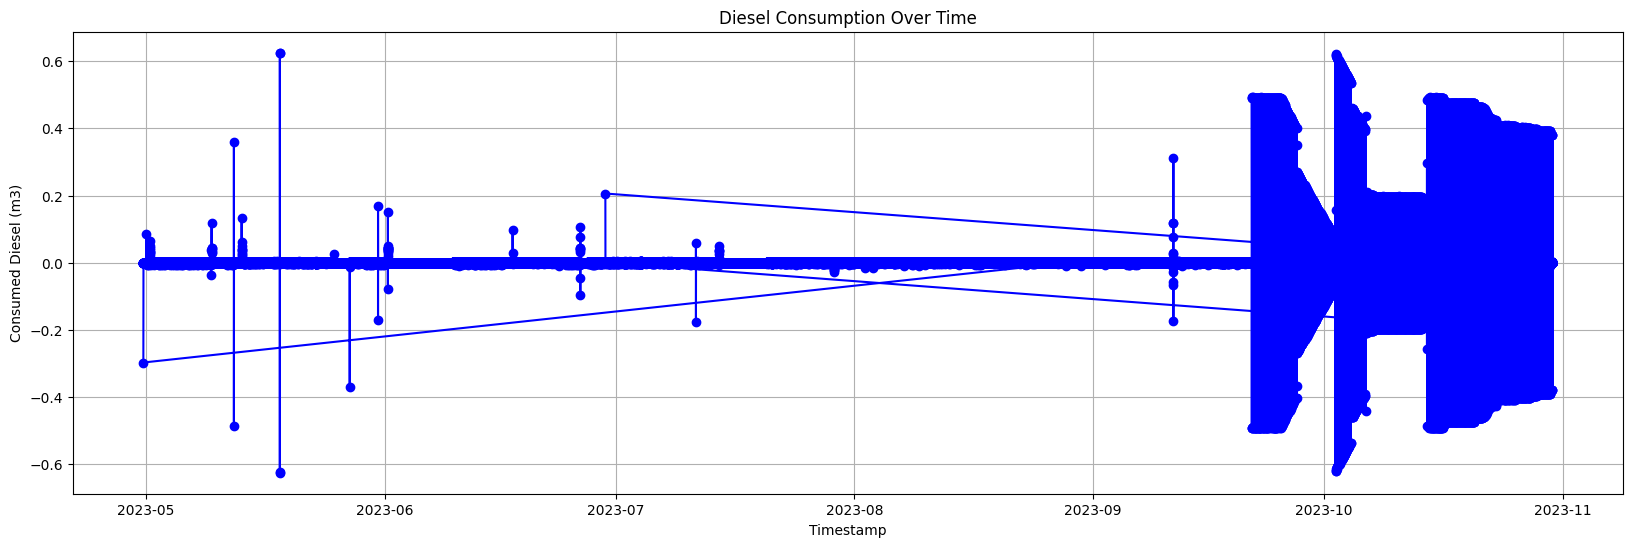

In [43]:
# Plot the relationship between timestamp and consumed diesel
%matplotlib inline
plt.figure(figsize=(20, 6))
plt.plot(data_df['Timestamp'], data_df['Consumed Diesel (m3)'], marker='o', linestyle='-', color='b')
plt.title('Diesel Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Consumed Diesel (m3)')
plt.grid(True)
plt.show()

In [44]:
data_df.shape

(272532, 7)

In [45]:
#slicing data with non-numerical columns (i.e column suitable for categorical) from the dataset
non_num_columns_data_df = data_df.loc[:, data_df.dtypes == 'object']

non_num_columns_data_df.shape

(272532, 1)

In [46]:
non_num_columns_data_df.head()

,Tank Status
0,OK
1,OK
2,OK
3,OK
4,OK


In [47]:
non_num_columns_data_df.nunique()

Tank Status    1
dtype: int64

In [48]:
non_num_columns_data_df.shape # Shape of dataframe with non-numeric values in columns

(272532, 1)

In [49]:
num_columns_data_df.shape # Shape of dataframe with numeric values in columns

(273082, 4)

In [50]:
#now, lets combine the non_num_columns_data_df and the cleaned num_columns_data_df

#cleaned_data_df = pd.concat([num_columns_data_df, non_num_columns_data_df], axis=1)

file_name = 'DC_0_EAJ0001C_log_20230430-1605_to_20231030-1604_cleaned.csv'

data_df.to_csv(file_name, index=False)

data_df.shape

(272532, 7)

In [51]:
# Download the CSV file into system locally
try: # If using Ggoogle Colab
    from google.colab import files
    files.download('file_name')
    print('Download')
except Exception as s: # If using Jupyter Lab
    from IPython.display import FileLink
    display(FileLink(file_name))
    print('Downloaded as link above -------->')
except Exception as e:
    print(f'Error: {e}')

/home/studio-lab-user/sagemaker-studiolab-notebooks/DC_0_EAJ0001C_log_20230430-1605_to_20231030-1604_cleaned.csv

Downloaded as link above -------->


Text(0, 0.5, 'Tank Remaining Fluid')

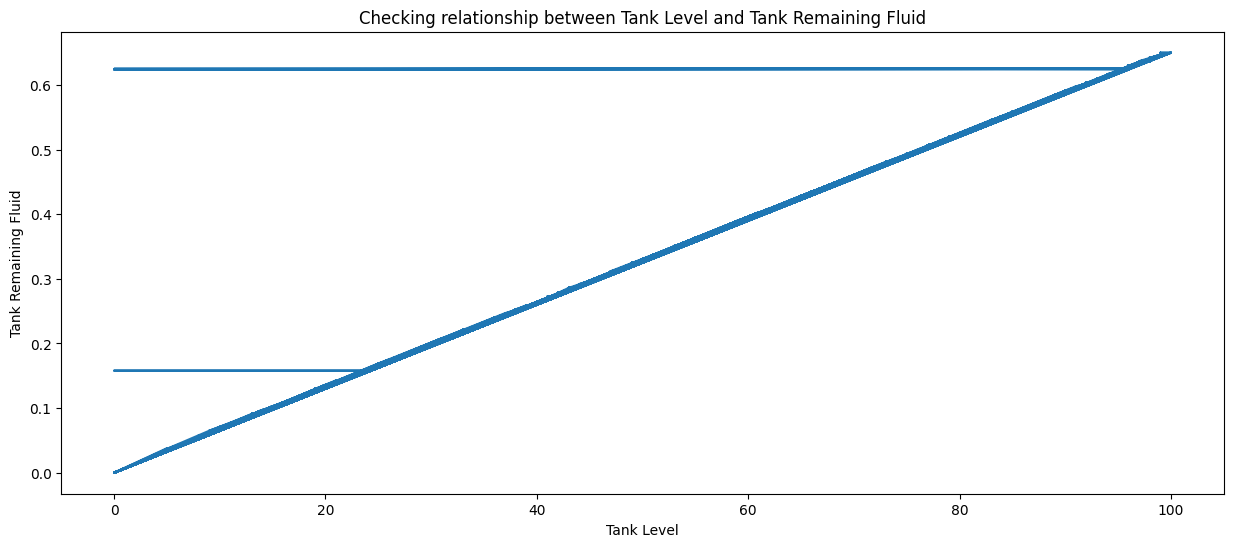

In [52]:
plt.figure(figsize=(15, 6))
plt.plot(data_df['Tank Level (%)'], data_df['Tank Remaining Fluid (m3)'], label='Value')
plt.title('Checking relationship between Tank Level and Tank Remaining Fluid')
plt.xlabel('Tank Level')
plt.ylabel('Tank Remaining Fluid')

Text(0, 0.5, 'Tank Volume (m3)')

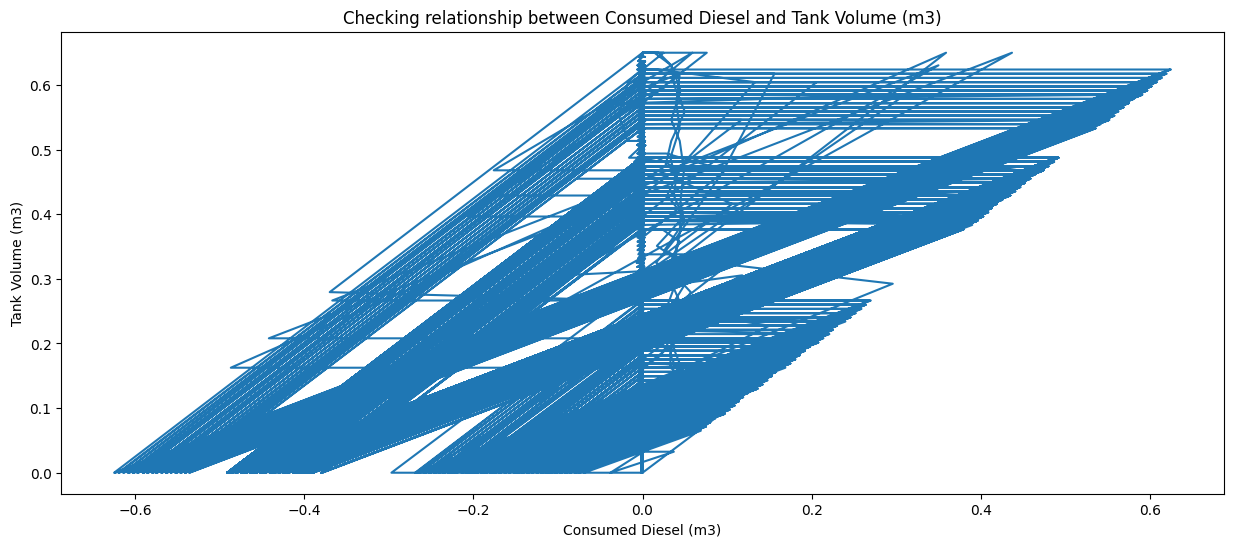

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(data_df['Consumed Diesel (m3)'], data_df['Tank Volume (m3)'], label='Value')
plt.title('Checking relationship between Consumed Diesel and Tank Volume (m3)')
plt.xlabel('Consumed Diesel (m3)')
plt.ylabel('Tank Volume (m3)')

# Feature Engineering

## Encoding manually or the Tank Status Column.

In [54]:
# One Hot Encoding ----> I have a Nominal Data
pd.set_option('display.max_columns', None)
data_df_encode = pd.get_dummies(data_df, columns=['Tank Status'], drop_first = True).set_index(data_df.index)


data_df_encode.head()

,Timestamp,Tank Level (%),Tank Remaining Fluid (m3),GeneratorSet (W),Tank Volume (m3),Consumed Diesel (m3)
0,2023-08-29 00:47:22,45.0,0.297,0.0,0.2925,0.000
1,2023-08-29 00:48:21,45.0,0.297,0.0,0.2925,0.000
2,2023-08-29 00:49:21,45.0,0.296,0.0,0.2925,-0.001
3,2023-08-29 00:50:21,45.0,0.297,0.0,0.2925,0.001
4,2023-08-29 00:51:21,45.0,0.297,0.0,0.2925,0.000


In [55]:
# Plottign a heatmap to see correlation between columns with integer values

correlation_matrix = data_df_encode.corr()

# FIrstly, let me print out manuly correlation base on descanding values for my numerical columns
correlation_result_CD = correlation_matrix['Consumed Diesel (m3)'].sort_values(ascending = False)
correlation_result_CD

Consumed Diesel (m3)         1.000000
Tank Remaining Fluid (m3)    0.101176
Tank Level (%)               0.100136
Tank Volume (m3)             0.100136
GeneratorSet (W)             0.025832
Timestamp                   -0.000095
Name: Consumed Diesel (m3), dtype: float64

In [56]:
correlation_result_TRF = correlation_matrix['Tank Remaining Fluid (m3)'].sort_values(ascending = False)
correlation_result_TRF

Tank Remaining Fluid (m3)    1.000000
Tank Level (%)               0.999813
Tank Volume (m3)             0.999813
Consumed Diesel (m3)         0.101176
GeneratorSet (W)            -0.087569
Timestamp                   -0.266987
Name: Tank Remaining Fluid (m3), dtype: float64

In [57]:
data_quick_view(data_df_encode)

Unique values in column ==============0== "Timestamp" is  ================= 272532
Unique values in column ==============1== "Tank Level (%)" is  ================= 97
Unique values in column ==============2== "Tank Remaining Fluid (m3)" is  ================= 475
Unique values in column ==============3== "GeneratorSet (W)" is  ================= 3926
Unique values in column ==============4== "Tank Volume (m3)" is  ================= 97
Unique values in column ==============5== "Consumed Diesel (m3)" is  ================= 430


In [58]:
data_df_encode.isnull().sum()

Timestamp                    0
Tank Level (%)               0
Tank Remaining Fluid (m3)    0
GeneratorSet (W)             0
Tank Volume (m3)             0
Consumed Diesel (m3)         0
dtype: int64

In [59]:
data_df_encode.describe()

,Timestamp,Tank Level (%),Tank Remaining Fluid (m3),GeneratorSet (W),Tank Volume (m3),Consumed Diesel (m3)
count,272532,272532.000000,272532.000000,272532.000000,272532.000000,2.725320e+05
mean,2023-07-31 11:45:20.129947904,68.321870,0.446893,724.879702,0.444092,3.045514e-07
min,2023-04-30 16:05:04,0.000000,0.000000,0.000000,0.000000,-6.250000e-01
25%,2023-06-15 18:41:47.249999872,50.000000,0.330000,0.000000,0.325000,0.000000e+00
50%,2023-07-31 13:13:09.500000,72.000000,0.474000,0.000000,0.468000,0.000000e+00
75%,2023-09-15 12:41:11.249999872,93.000000,0.607000,0.000000,0.604500,0.000000e+00
max,2023-10-30 16:04:55,100.000000,0.650000,6809.000000,0.650000,6.250000e-01
std,NaN,24.894651,0.161456,1449.091343,0.161815,3.267308e-02


In [60]:
file_name = 'DC_0_EAJ0001C_log_20230430-1605_to_20231030-1604_encoded.csv'

#cleaned_data_df is my cleaned DataFrame
data_df_encode.to_csv(file_name, index=False)

data_df_encode.shape
# Download the CSV file into system locally
try: # If using Ggoogle Colab
    from google.colab import files
    files.download('file_name')
    print('Download')
except Exception as s: # If using Jupyter Lab
    from IPython.display import FileLink
    display(FileLink(file_name))
    print('Downloaded as link above -------->')
except Exception as e:
    print(f'Error: {e}')

/home/studio-lab-user/sagemaker-studiolab-notebooks/DC_0_EAJ0001C_log_20230430-1605_to_20231030-1604_encoded.csv

Downloaded as link above -------->


# Lets build the model now

The Prophet Algorithm built by Meta for now
Prophet is designed for forecasting time series data that exhibits patterns on different time scales. It handles missing data and outliers well.

In [61]:
prophet_data = data_df_encode[['Timestamp', 'Consumed Diesel (m3)']]
data_quick_view(prophet_data)

prophet_data.columns = ['ds', 'y'] # Rename the TImestamp to 'ds' and Downtime to 'y' as needed my the algorithm
print(prophet_data.shape)
prophet_data.head()

Unique values in column ==============0== "Timestamp" is  ================= 272532
Unique values in column ==============1== "Consumed Diesel (m3)" is  ================= 430
(272532, 2)


,ds,y
0,2023-08-29 00:47:22,0.000
1,2023-08-29 00:48:21,0.000
2,2023-08-29 00:49:21,-0.001
3,2023-08-29 00:50:21,0.001
4,2023-08-29 00:51:21,0.000


In [62]:
# Spliting the dataset into training and testing sets
train_size = int(len(prophet_data) * 0.8) # Pick 80%
train_data, test_data = prophet_data[:train_size], prophet_data[train_size:]
train_data.shape

(218025, 2)

In [63]:
test_data.shape

(54507, 2)

In [64]:
# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(train_data)

00:31:25 - cmdstanpy - INFO - Chain [1] start processing
00:31:55 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
test_forecast = prophet_model.predict(test_data)

future_dates = prophet_model.make_future_dataframe(periods=365)  # Forecasting for the next year (365 days)
forecast_365 = prophet_model.predict(future_dates)

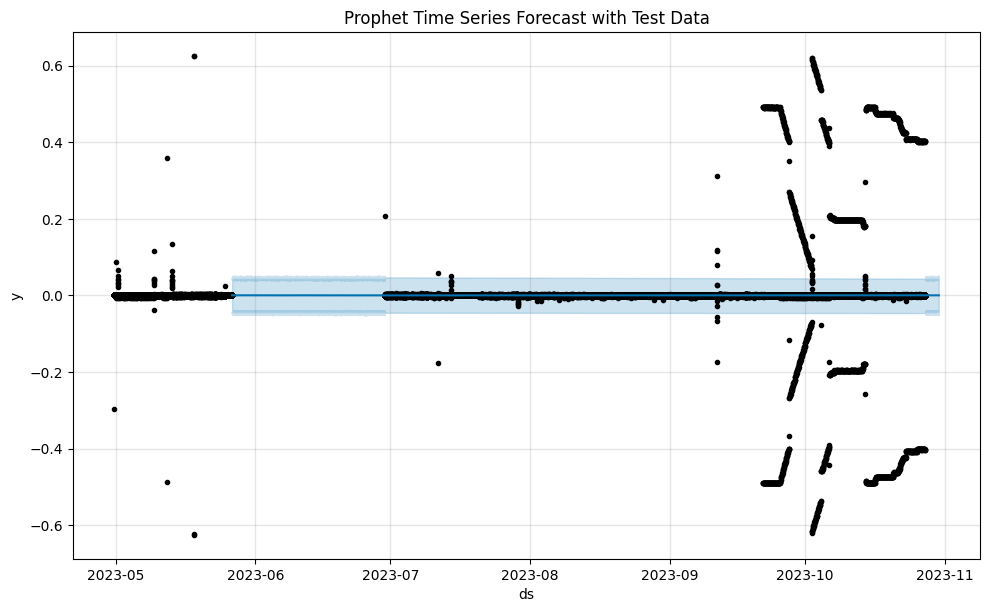

In [66]:
# Plotting the graph
fig = prophet_model.plot(test_forecast)
plt.title('Prophet Time Series Forecast with Test Data')
plt.show()

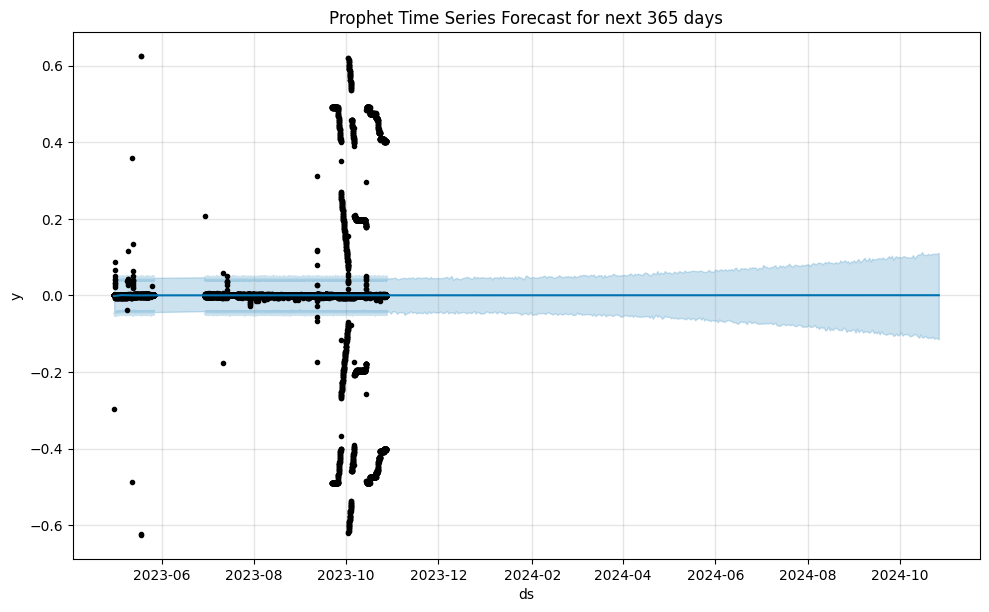

In [67]:
# Plotting the graph
fig = prophet_model.plot(forecast_365)
plt.title('Prophet Time Series Forecast for next 365 days')
plt.show()

In [68]:
y_test = test_data['y']
mae = mean_absolute_error(y_test, test_forecast['yhat'])
print(f'MAE = {mae}')

mse = mean_squared_error(y_test, test_forecast['yhat'])
print(f'MSE = {mse}')

MAE = 0.0014716798405066053
MSE = 0.00041235033348499935


# Lets build a model with the AutoRegressive Integrated Moving Average (ARIMA)
Some EDA that will be needed may include
- Stationarity Check using Augumented Dickey-FUller Test
- Plotting the AutoCorrelation Function (ACF) to identify the order of the ARIMA Model
- Plotting the Partial AutoCorrelation Function (PACF) to identify the order of the ARIMA Model
- Outlier Detection Techniques to handle outliers in the model
- Smoothing ETC

In [69]:
X = data_df_encode.drop('Consumed Diesel (m3)', axis=1)  # Features
y = data_df_encode[['Consumed Diesel (m3)']]  # Target

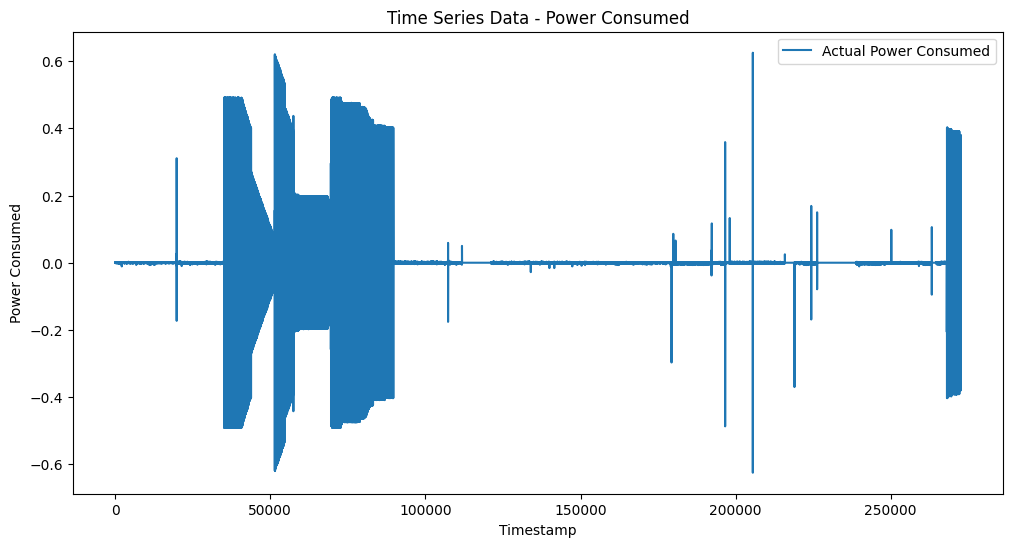

In [70]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Power Consumed')
plt.title('Time Series Data - Power Consumed')
plt.xlabel('Timestamp')
plt.ylabel('Power Consumed')
plt.legend()
plt.show()

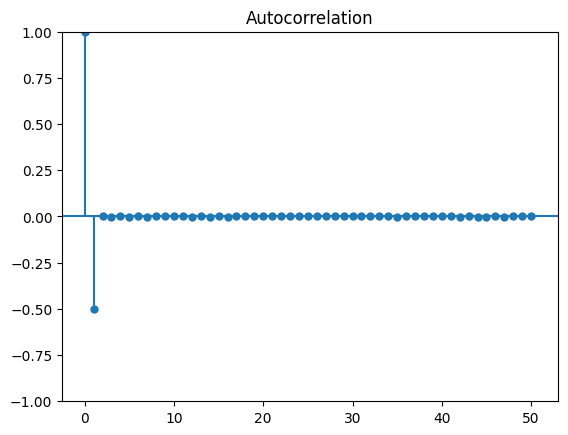

<Figure size 1200x600 with 0 Axes>

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF

plot_acf(y, lags=50) #autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plt.show()

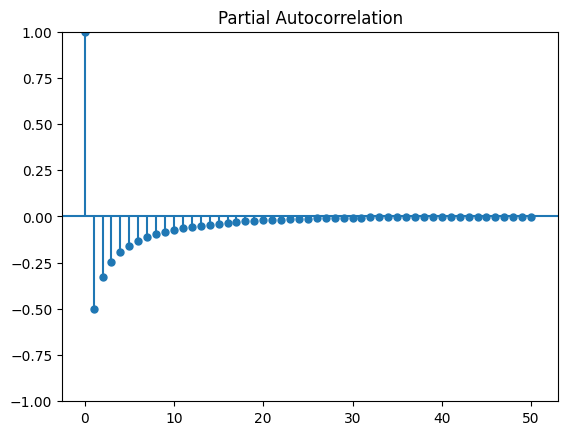

<Figure size 1200x600 with 0 Axes>

In [72]:
# Plot PACF
plot_pacf(y, lags=50) # partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plt.show()

In [73]:
# Split the dataset into training and testing sets
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

In [74]:
# Train the ARIMA model
order = (1, 10, 1)   #The (p, d, q) order in an ARIMA model representing three components
model = ARIMA(train, order=order)

In [75]:
fit_model = model.fit()

In [76]:
# Forecast on the test set
forecast = fit_model.get_forecast(steps=len(test))

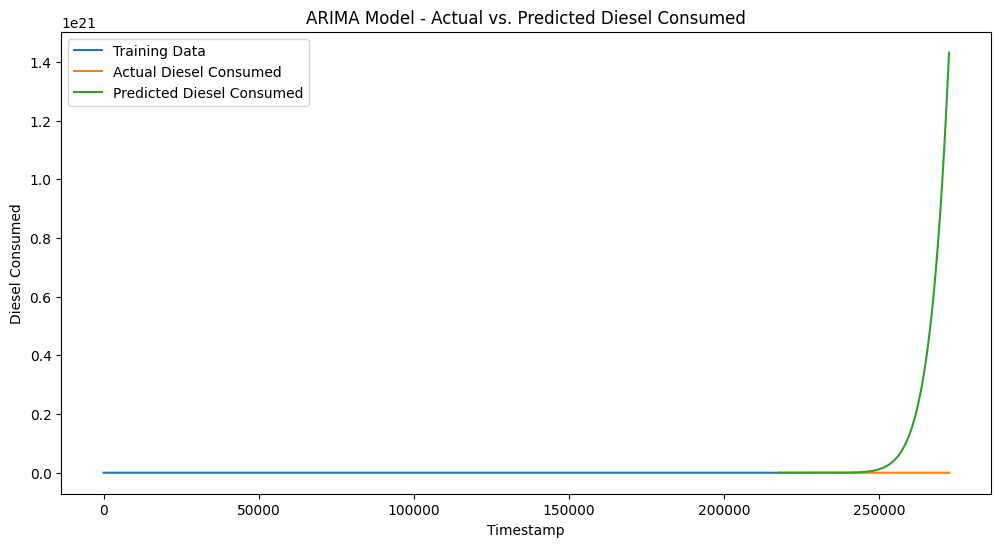

In [77]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Diesel Consumed')
plt.plot(forecast.predicted_mean, label='Predicted Diesel Consumed')
plt.title('ARIMA Model - Actual vs. Predicted Diesel Consumed')
plt.xlabel('Timestamp')
plt.ylabel('Diesel Consumed')
plt.legend()
plt.show()

# Lets build another model with XGBoost Algorithm.
## The Extreme Gradient Boost (XGBoost) will help use better take care of Overfitting and Underfitting

In [ ]:

# Lets encode the timestamp
from sklearn.preprocessing import LabelEncoder

# Assuming 'timestamp_column' is your timestamp column
timestamp_columns = ['year', 'month', 'day', 'hour', 'minute']

label_encoders = {}

for col in timestamp_columns:
    label_encoders[col] = LabelEncoder()
    data_df_encode[col + '_encoded'] = label_encoders[col].fit_transform(data_df_encode['Timestamp'].dt.__getattribute__(col))

# Drop the original timestamp column
XGB_data_df = data_df_encode.drop('Timestamp', axis=1)
XGB_data_df

In [ ]:
#Define features (X) and target (y)
X = XGB_data_df.drop('Consumed Diesel (m3)', axis=1)  # Features
y = XGB_data_df[['Consumed Diesel (m3)']]  # Target

print(X.head())

print(y.head())

print(y.isnull().sum())

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model
model = XGBRegressor(
    #eval_metric='logloss'  # Logarithmic loss for evaluation
)

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE = {mae:.2f}')

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE = {mse:.2f}')

In [ ]:
rsme = sqrt(mse)
print(f'RMSE = {rsme:.2f}')

In [ ]:
# From the above 3 models, the Prophet Model seems to be the best performing models and is recommended for production use.

# Testing our model with the new validation data


In [ ]:
data_head_test_df  = data_head_df4 
test_df = data_df4

Cleaning the data for predictions

In [ ]:
test_df.head()

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-10-27 16:05:51,1.0,Not active,Open,Open,Ok,222.7,16.9,50.36,3162.0,222.7,15.9,50.2,3096.0,54.48,0.8,AC Input 2,32.0,32.0,32.0,Float,No error,On,Ok,Ok,Ok,

In [ ]:
test_df.shape

(4455, 92)

In [ ]:
data_head_test_df = pd.read_csv(download_link_test, header = None, skiprows=lambda x: x not in rows_to_load)
data_head_test_df.head()

NameError: name 'download_link_test' is not defined

In [ ]:
header_writer(test_df,data_head_test_df)
test_df.columns = test_df.columns.set_names(None)
test_df.head(4)

In [ ]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(test_df,common_columns_list)

test_df.shape

In [ ]:
null_counter(test_df)

In [ ]:
# Now i am picking columns related to another dataframe,
# Using drop method is stressful and not giving me what i wanted after several trials.

selected_column_indices = [0, 66, 67, 68, 78] # Picking Genset because its the Gen that uses the diesel
test_df = test_df.iloc[:, selected_column_indices]

data_quick_view(test_df)

test_df.shape

In [ ]:
column_names = test_df.columns.tolist()
timestamp_new_name = 'Timestamp'
new_name1 = 'Tank Level (%)'
new_name2 = 'Tank Remaining Fluid (m3)'
new_name3 = 'Tank Status'
new_name4= 'GeneratorSet (W)'
column_names[0], column_names[1], column_names[2], column_names[3], column_names[4] = timestamp_new_name,new_name1,new_name2,new_name3, new_name4

test_df.columns = column_names

test_df.head(2)

In [ ]:
#converting our timestamp.  Africa/Lagos (+01:00) column to the right datetime dtype
# Will be helpful for time series modelling
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])#, format='mixed') # The format mixed tells that my datasets doesn't have one specific format for all timestamp row in the dataset

test_df.head(2)

In [ ]:
#slicing data with numerical columns (i.e int32 and float64) from the dataset
num_columns_test_df = test_df.loc[:, data_df.dtypes != 'object']

#num_columns_data_df = data_df.select_dtypes(include = [np.number]) # Should have used this to select my features but cus of TimeStamp column
num_columns_test_df.shape

In [ ]:
num_columns_test_df.isnull().sum().sum() #This tells the total number of NaN in the columns with numerical values from the datasets

In [ ]:
test_df.isnull().sum().sum() #This tells the total number of NaN in every columns of the datasets

In [ ]:
num_columns_test_df = num_columns_test_df.fillna(0) # FIlling NaN in the setions dataset


# Select only numeric columns whose values is float or integer
#numeric_columns = data_df.select_dtypes(include= ['float64', 'int32', 'datetime64[ns]']).columns

numeric_columns = num_columns_test_df.columns
print(test_df[numeric_columns].isnull().sum().sum())
# Fill NaN values with 0 for numeric columns
test_df[numeric_columns] = test_df[numeric_columns].fillna(0) #  FIlling NaN with Zero in the main dataset

print(test_df[numeric_columns].isnull().sum().sum())
test_df.head()

In [ ]:
test_df.isnull().sum().sum() # Nan column now reduced

In [ ]:
test_df = test_df.iloc[550:]

test_df = test_df.reset_index(drop=True)

In [ ]:
# Convert Tank Level (%) to cubic meters using the known tank volume
test_df['Tank Volume (m3)'] = (test_df['Tank Level (%)'] / 100 )* tank_volume
test_df['Consumed Diesel (m3)'] = (test_df['Tank Remaining Fluid (m3)'].diff())
test_df['Consumed Diesel (m3)'] = test_df['Consumed Diesel (m3)'].fillna(0)

In [ ]:
test_df.head(50)

In [ ]:
# One Hot Encoding ----> I have a Noinal Data
pd.set_option('display.max_columns', None)
test_df_encode = pd.get_dummies(test_df, columns=['Tank Status'], drop_first = True).set_index(test_df.index)


test_df_encode.head()

# Using the Prophet Model

In [ ]:
prophet_test_data = test_df_encode[['Timestamp', 'Consumed Diesel (m3)']]
data_quick_view(prophet_test_data)

prophet_test_data.columns = ['ds', 'y'] # Rename the TImestamp to 'ds' and Downtime to 'y' as needed my the algorithm
print(prophet_test_data.shape)
prophet_test_data.head()

In [ ]:
test_forecast = prophet_model.predict(prophet_test_data)

future_dates = prophet_model.make_future_dataframe(periods=365)  # Forecasting for the next year (365 days)
forecast_365 = prophet_model.predict(future_dates)

In [ ]:
# Plotting the graph
fig = prophet_model.plot(test_forecast)
plt.title('Prophet Time Series Forecast with Test Data')
plt.show()

In [ ]:
# Plotting the graph
fig = prophet_model.plot(forecast_365)
plt.title('Prophet Time Series Forecast for next 365 days')
plt.show()

In [ ]:
y_test = prophet_test_data['y']
mae = mean_absolute_error(y_test, test_forecast['yhat'])
print(f'MAE = {mae}')

mse = mean_squared_error(y_test, test_forecast['yhat'])
print(f'MSE = {mse}')

# Using the XGBOOST MODEL

In [ ]:

# Lets encode the timestamp
from sklearn.preprocessing import LabelEncoder

# Assuming 'timestamp_column' is your timestamp column
timestamp_columns = ['year', 'month', 'day', 'hour', 'minute']

label_encoders = {}

for col in timestamp_columns:
    label_encoders[col] = LabelEncoder()
    test_df_encode[col + '_encoded'] = label_encoders[col].fit_transform(test_df_encode['Timestamp'].dt.__getattribute__(col))

# Drop the original timestamp column
XGB_test_df = test_df_encode.drop('Timestamp', axis=1)
XGB_test_df

In [ ]:
X_test = XGB_test_df.drop('Consumed Diesel (m3)', axis=1)  # Features
y_test = XGB_test_df[['Consumed Diesel (m3)']]  # Target

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE = {mae:.2f}')

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE = {mse:.2f}')

In [ ]:
rsme = sqrt(mse)
print(f'RMSE = {rsme:.2f}')

## THANKS